# $k$-Moyennes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## Chargement d'un jeux de données

Utilisation des jeux de données disponibles sous Scikit-Learn :
https://scikit-learn.org/stable/datasets/index.html

Choisissez un des jeux de données, e.g. 
    
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    
    # Visualisation
    plt.figure()
    plt.scatter(X[:,0], y[:,0], s=7, c=y)
    plt.show

affiche
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9]
[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5]


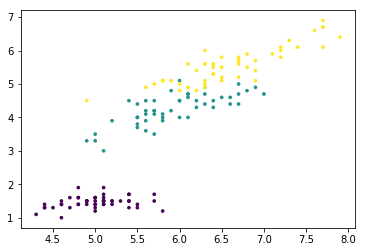

In [7]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print("affiche")
print(X[0:10,0])
print(X[0:10,2])
# Visualisation
plt.figure()
plt.scatter(X[:,0], X[:,2], s=7, c=y)
plt.show()

In [40]:
def k_means(data, nbCentroides):
    centroides = choixCentroides(data,nbCentroides)
    print(centroides)
    nb = 0
    nb_iterations = 6
    target = [-1 for col in range(data.shape[0])]
    while nb < nb_iterations : 
        for i in range(data.shape[0]): # pour chacun des points
            distance_centroides = np.asarray([0 for col in range(centroides.shape[0])])
            for j in range(centroides.shape[0]): # pour le nombre de centroides
                
                distsous = np.subtract(data[i],centroides[j])
                for k in range(centroides.shape[1]): # pour les x y z des centroides
                    distance_centroides[j] += np.power(distsous[k],2)
                distance_centroides[j] = np.sqrt(distance_centroides[j])
            min_dist = np.min(distance_centroides, axis=0)
            centroides_plus_proche = -1
            for j in range(distance_centroides.shape[0]):
                if distance_centroides[j] == min_dist:
                    centroides_plus_proche = j
            target[i] = centroides_plus_proche
        centroides = recalcul_centroides(data,nbCentroides,target)    
        nb += 1
    return np.asarray(target)

def recalcul_centroides(data,nb,target):
    ret = [[0 for col in range(data.shape[1])] for col in range(nb)] # initialize array with value 0
    nbPoints = [0 for col in range(nb)]
    for i in range(data.shape[0]):
        nbPoints[target[i]] += 1
        ret[target[i]] = np.add(ret[target[i]], data[i]) 
    for i in range(nb):
        ret[nb] = ret[nb] / nbPoints[nb]
    print(ret)
    return np.asarray(ret)

def choixCentroides(data,nb):
    ret = [0 for col in range(nb)] # initialize array with value 0
    mini = np.min(data,axis=0)
    maxi = np.max(data,axis=0)
    for i in range(nb): 
        tmp = [0 for col in range(data.shape[1])] # initialize array with value 0
        for j in range(data.shape[1]):
            tmp[j] = np.random.uniform(mini[j],maxi[j])
        ret[i] = tmp
    return np.asarray(ret)

def assign_center(X,C)
targ = k_means(iris.data,3)
print(targ)
print(iris.target)

plt.figure()
plt.scatter(X[:,0], X[:,2], s=7, c=targ)
plt.show()
plt.figure()
plt.scatter(X[:,0], X[:,2], s=7, c=y)
plt.show()

[[5.97495646 3.12780066 2.91872345 0.85164451]
 [7.84571283 3.08273456 3.79029936 0.89386068]
 [5.44202111 4.19638951 1.77195474 1.68287941]]


IndexError: list index out of range